In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df_train = pd.read_excel('/home/sk-ji/Downloads/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Data_Train.xlsx')
df_train.head(50)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [50]:
df_test = pd.read_excel('/home/sk-ji/Downloads/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [51]:
df_train.shape

(10683, 11)

In [52]:
df_test.shape

(2671, 10)

In [53]:
df = pd.concat([df_train, df_test],ignore_index=True)
df.shape

/home/sk-ji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(13354, 11)

In [54]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [55]:
df.dtypes

Additional_Info     object
Airline             object
Arrival_Time        object
Date_of_Journey     object
Dep_Time            object
Destination         object
Duration            object
Price              float64
Route               object
Source              object
Total_Stops         object
dtype: object

In [56]:
df.isnull().sum()


Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Total_Stops           1
dtype: int64

### Null Value Analysis

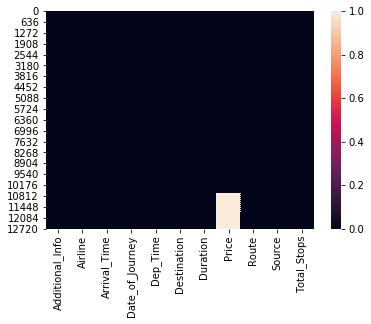

In [57]:
sns.heatmap(df.isnull())

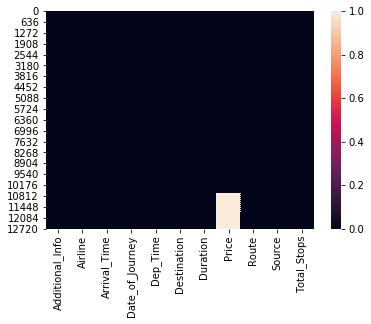

In [58]:
sns.heatmap(df.isnull())

In [59]:
df.shape

(13354, 11)

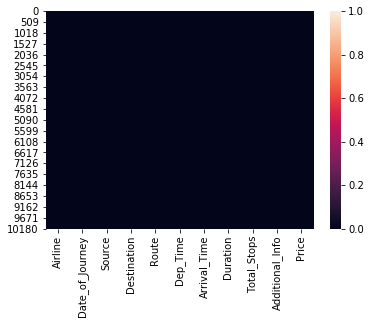

In [60]:
sns.heatmap(df_train.isnull())

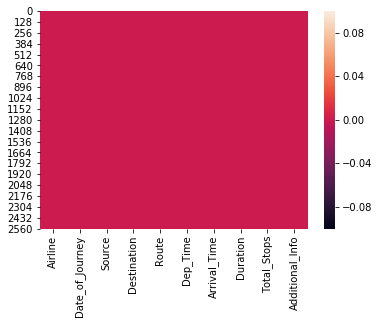

In [61]:
sns.heatmap(df_test.isnull())

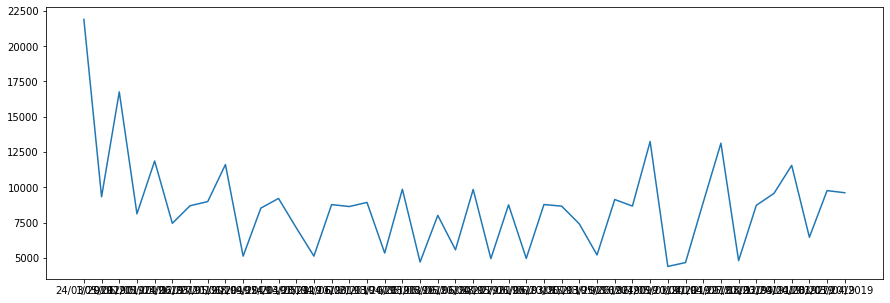

In [62]:
plt.subplots(figsize=[15,5])
plt.plot(df_train.Date_of_Journey.unique(),df_train.groupby(['Date_of_Journey']).mean())

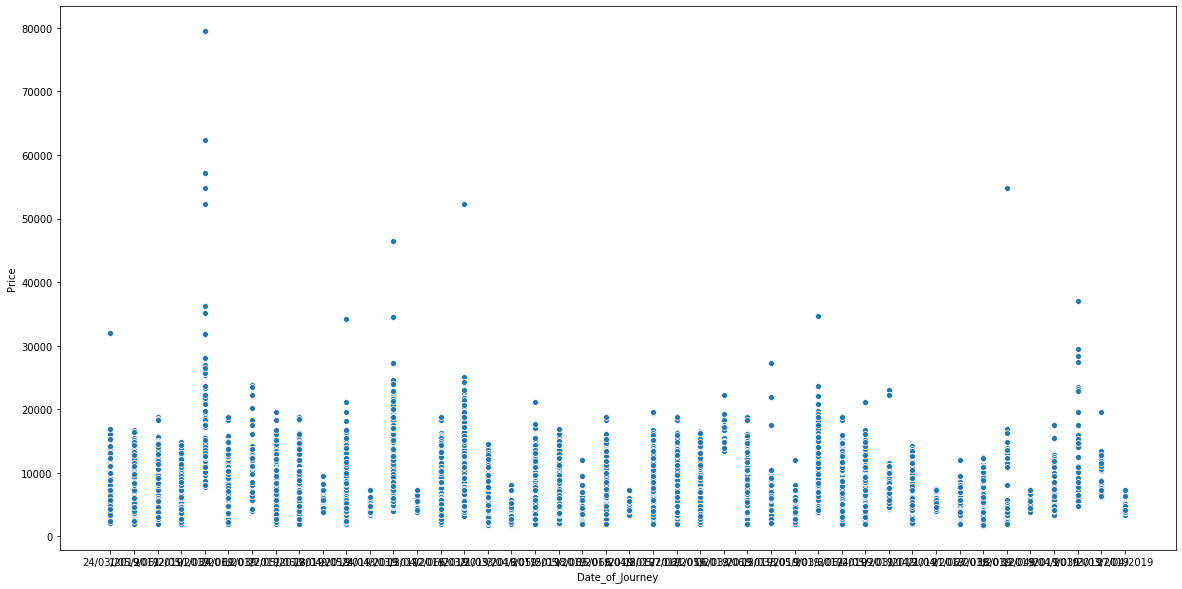

In [63]:
plt.subplots(figsize=[20,10])

sns.scatterplot(x='Date_of_Journey',y='Price',data=df_train)

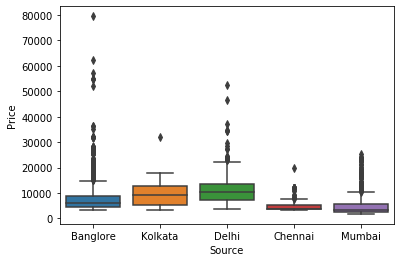

In [64]:
sns.boxplot(df_train.Source, df_train.Price )

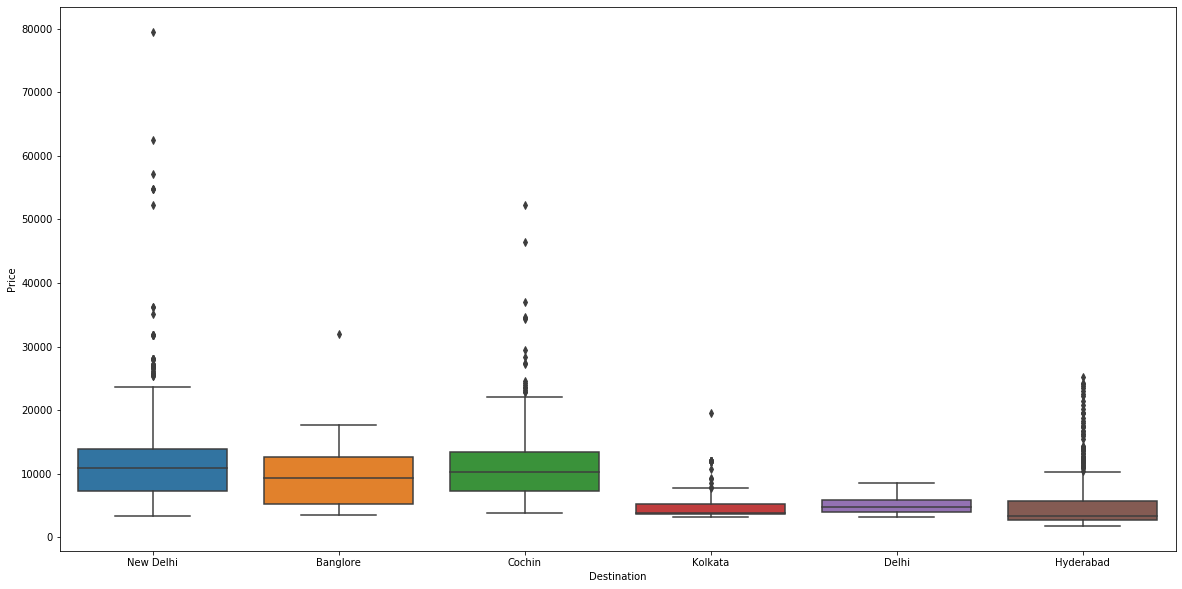

In [65]:
#Destination VS Price
plt.subplots(figsize=[20,10])
sns.boxplot(df_train.Destination, df_train.Price )

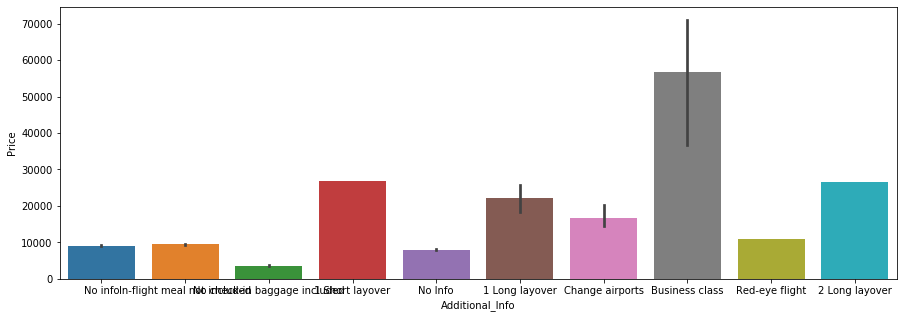

In [66]:
plt.subplots(figsize=[15,5])
sns.barplot(df_train.Additional_Info, df_train.Price )

In [67]:
df_train['Dep_Time'] = pd.to_datetime(df_train.Dep_Time, format= '%H:%M').dt.time
df_train['Dep_Time'].head()

0    22:20:00
1    05:50:00
2    09:25:00
3    18:05:00
4    16:50:00
Name: Dep_Time, dtype: object

In [70]:
df_train.Arrival_Time.head()

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
Name: Arrival_Time, dtype: object

In [73]:
df_train.Arrival_Time = df_train.Arrival_Time.str.slice(0,6)
df_train.Arrival_Time.head()

0    01:10 
1     13:15
2    04:25 
3     23:30
4     21:35
Name: Arrival_Time, dtype: object

In [74]:
df_train.Arrival_Time=df_train.Arrival_Time.str.strip()
df_train.Arrival_Time.head()

0    01:10
1    13:15
2    04:25
3    23:30
4    21:35
Name: Arrival_Time, dtype: object

In [75]:
df_train.Arrival_Time=pd.to_datetime(df_train.Arrival_Time, format = '%H:%M').dt.time

In [76]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302


In [77]:
df_train.Date_of_Journey=pd.to_datetime(df_train.Date_of_Journey,format='%d/%m/%Y').dt.date


In [78]:
df_train.Date_of_Journey.head()

0    2019-03-24
1    2019-05-01
2    2019-06-09
3    2019-05-12
4    2019-03-01
Name: Date_of_Journey, dtype: object

In [80]:
df_train['Duration']=  df_train['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [81]:
df_train['Duration'].head()

0     170
1     445
2    1140
3     325
4     285
Name: Duration, dtype: int64

In [82]:
df_train.Total_Stops.value_counts()


1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [83]:
dic={'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops': 4}
df_train['Total_Stops']= df_train.Total_Stops.map(dic)
df_train.Total_Stops= df_train.Total_Stops.astype('category')

In [84]:
df_train.Total_Stops.head()

0    0.0
1    2.0
2    2.0
3    1.0
4    1.0
Name: Total_Stops, dtype: category
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 4.0]

In [91]:
df_train.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [92]:
df_train.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [99]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_train['Airline_encoded'] = encoder.fit_transform(df_train['Airline'])
# print(df_train['Airline_encoded'].unique())
# print(df_train['Airline_encoded'].value_counts()
# df_train.Airline_encoded.head()
      



In [100]:
print(df_train['Airline_encoded'].unique())


[ 3  1  4  8  6  2 10  0 11  5  7  9]


In [102]:
df_train['Airline_encoded'].value_counts()


4     3849
3     2053
1     1752
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: Airline_encoded, dtype: int64

In [103]:
df_train = df_train.drop(['Airline'])

0    3
1    1
2    4
3    3
4    3
Name: Airline_encoded, dtype: int64